In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('laptop_data.csv')

df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [3]:
df.shape

(1303, 12)

## Data Cleaning

In [4]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [5]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [7]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(29)

In [9]:
df = df.drop_duplicates(keep='first')

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.shape

(1274, 11)

In [12]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [13]:
df['Ram'] = df['Ram'].apply(lambda x:x.replace('GB',''))
df['Weight'] = df['Weight'].apply(lambda x:x.replace('kg',''))

In [14]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   object 
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   object 
 10  Price             1274 non-null   float64
dtypes: float64(2), object(9)
memory usage: 119.4+ KB


In [16]:
# Converting Ram and Weight to numeric data type.
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   int32  
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   float32
 10  Price             1274 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 109.5+ KB


In [17]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


## EDA

<Axes: xlabel='Price', ylabel='Density'>

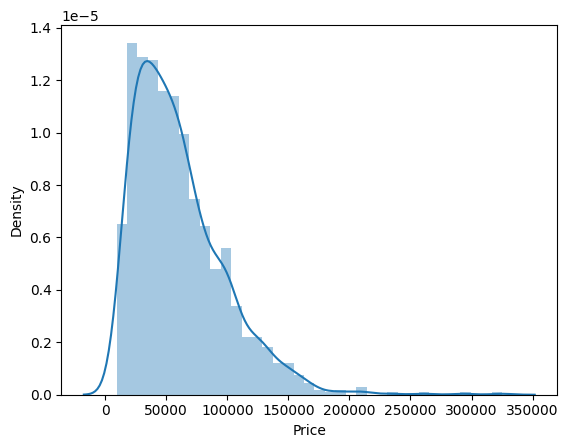

In [18]:
sns.distplot(df['Price'])

<Axes: xlabel='Company'>

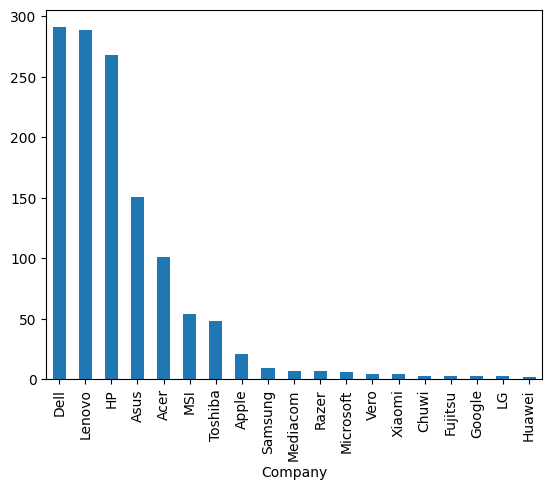

In [19]:
df['Company'].value_counts().plot(kind='bar')

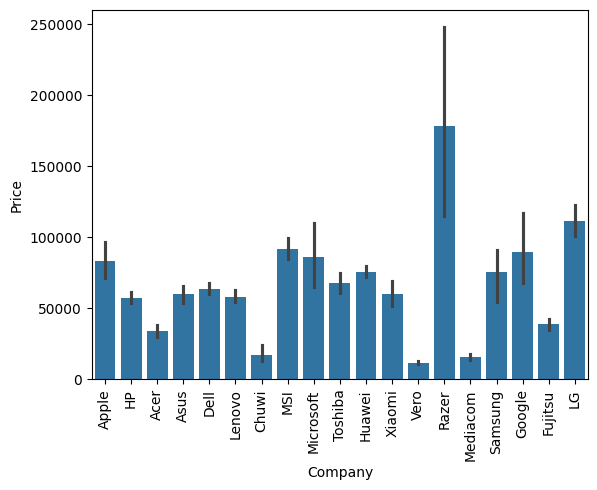

In [20]:
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='TypeName'>

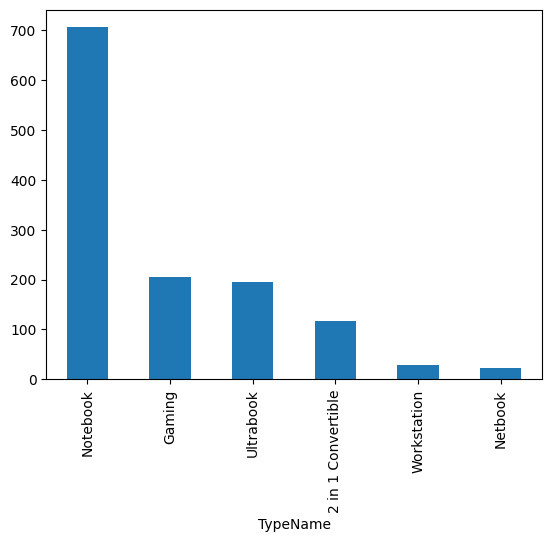

In [21]:
df['TypeName'].value_counts().plot(kind='bar')

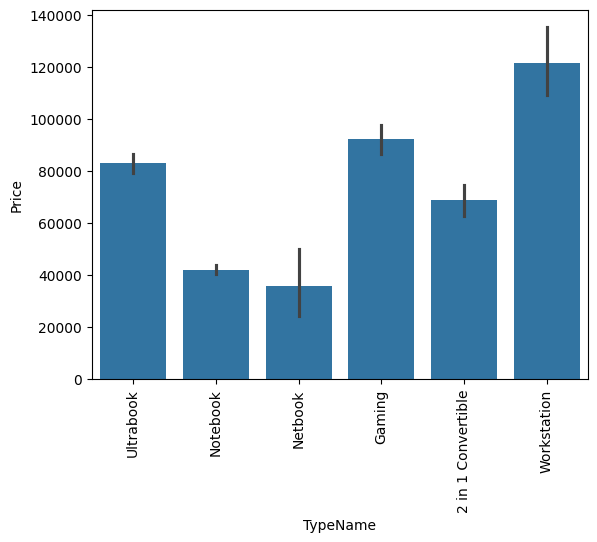

In [22]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='Inches', ylabel='Density'>

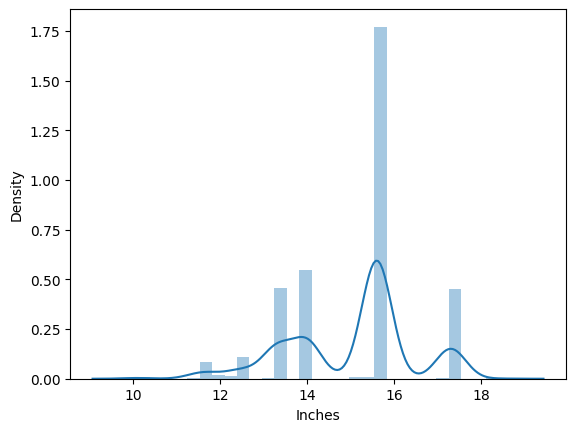

In [23]:
sns.distplot(df['Inches'])

In [24]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                505
1366x768                                         262
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         51
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
IPS Panel 1366x768                                 7
Touchscreen 2560x1440                              7
4K Ultra HD 3840x2160                              7
IPS Panel Retina Display 2304x1440                 6
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440                    5
1440x900                     

In [25]:
df['TouchScreen'] = df['ScreenResolution'].apply(lambda x : 1 if 'Touchscreen' in x else 0)

In [26]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0


<Axes: xlabel='TouchScreen'>

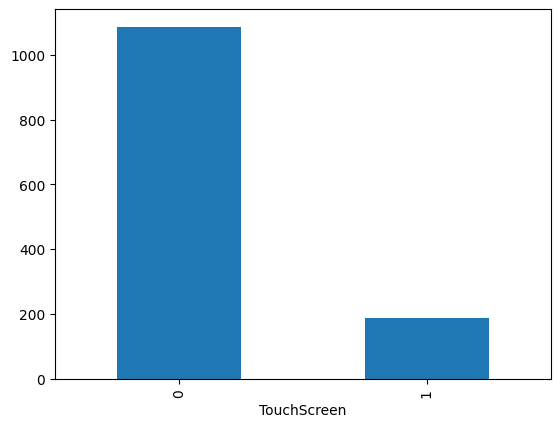

In [27]:
df['TouchScreen'].value_counts().plot(kind='bar')

<Axes: xlabel='TouchScreen', ylabel='Price'>

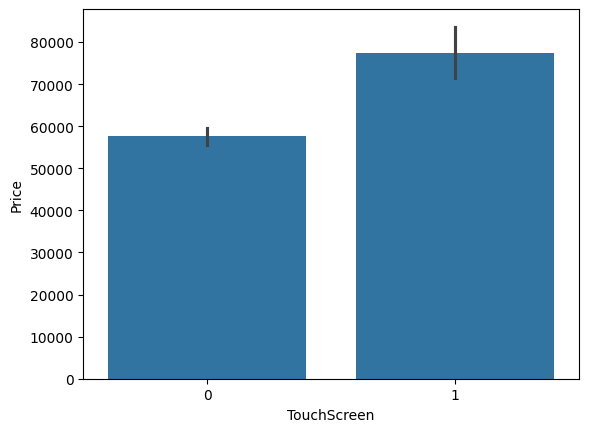

In [28]:
sns.barplot(x=df['TouchScreen'],y=df['Price'])

In [29]:
df['IPS'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [30]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS
109,Lenovo,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.58,78854.4000,0,1
687,Dell,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4,1TB HDD,AMD Radeon R5 M430,Windows 10,2.20,29073.2976,0,0
121,MSI,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 2TB HDD,Nvidia GeForce GTX 1070,Windows 10,1.80,119427.1200,0,0
165,MSI,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.40,95850.7200,0,1
1038,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 6300U 2.4GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,2.09,56633.9760,0,0


<Axes: xlabel='IPS'>

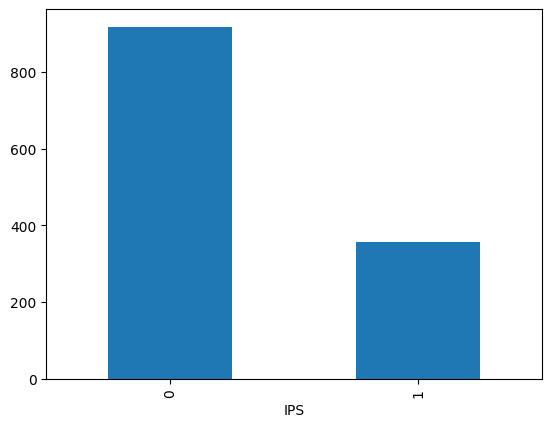

In [31]:
df['IPS'].value_counts().plot(kind='bar')

<Axes: xlabel='IPS', ylabel='Price'>

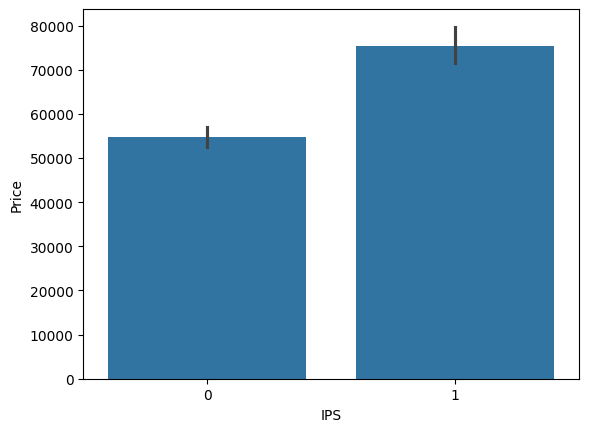

In [32]:
sns.barplot(x=df['IPS'],y=df['Price'])

In [33]:
res = df['ScreenResolution'].str.split('x',n=1,expand=True)

df['X_res'] = res[0] 
df['Y_res'] = res[1]

df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [34]:
df['X_res'] = df['X_res'].str.replace(' ','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   int32  
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   float32
 10  Price             1274 non-null   float64
 11  TouchScreen       1274 non-null   int64  
 12  IPS               1274 non-null   int64  
 13  X_res             1274 non-null   object 
 14  Y_res             1274 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(2), object(9)
memory usage: 149.3+ KB


In [36]:
df['X_res'] = df['X_res'].astype('int32')
df['Y_res'] = df['Y_res'].astype('int32')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   int32  
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   float32
 10  Price             1274 non-null   float64
 11  TouchScreen       1274 non-null   int64  
 12  IPS               1274 non-null   int64  
 13  X_res             1274 non-null   int32  
 14  Y_res             1274 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 139.3+ KB


In [37]:
df.corr(numeric_only=True)['Price']

Inches         0.066990
Ram            0.740106
Weight         0.212192
Price          1.000000
TouchScreen    0.188631
IPS            0.250358
X_res          0.552074
Y_res          0.548111
Name: Price, dtype: float64

In [38]:
# Creating pixels per inch (PPI) column
dp = ( (df['X_res']**2) + (df['Y_res']**2) )**0.5
di = df['Inches']
df['PPI'] = (dp/di).astype('float')

df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [39]:
df.corr(numeric_only=True)['Price']

Inches         0.066990
Ram            0.740106
Weight         0.212192
Price          1.000000
TouchScreen    0.188631
IPS            0.250358
X_res          0.552074
Y_res          0.548111
PPI            0.469539
Name: Price, dtype: float64

In [40]:
# Since we have created PPI, we don't need these columns, so dropping them.
df.drop(columns=['ScreenResolution','Inches','X_res','Y_res'],inplace=True)

df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [41]:
df['Cpu_name'] = df['Cpu'].apply(lambda x : ' '.join(x.split()[0:3]))

df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,Cpu_name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [42]:
def fetch_processor(text):
    if text=='Intel Core i7' or text=='Intel Core i5' or text=='Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return "AMD Processor"

In [43]:
df['CPU_brand'] = df['Cpu_name'].apply(fetch_processor)

df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,Cpu_name,CPU_brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


<Axes: xlabel='CPU_brand'>

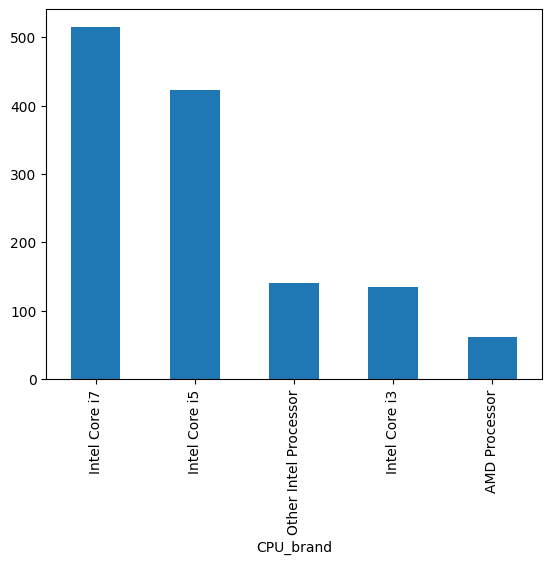

In [44]:
df['CPU_brand'].value_counts().plot(kind='bar')

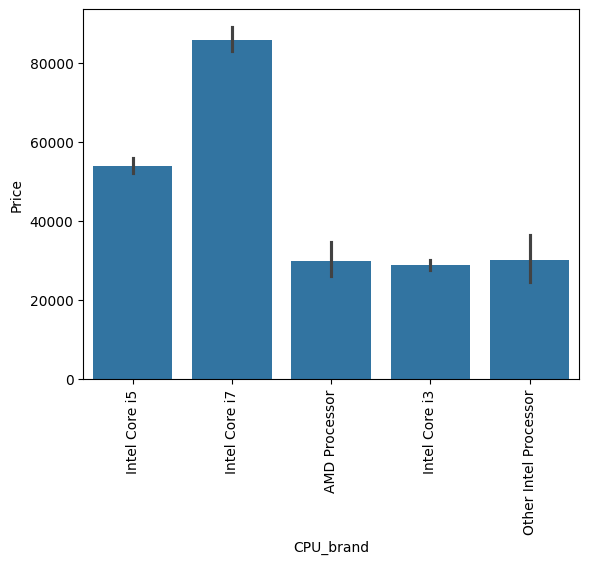

In [45]:
sns.barplot(x=df['CPU_brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [46]:
# We don't need these 2 columns anymore.
df.drop(columns=['Cpu','Cpu_name'],inplace=True)

df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


<Axes: xlabel='Ram'>

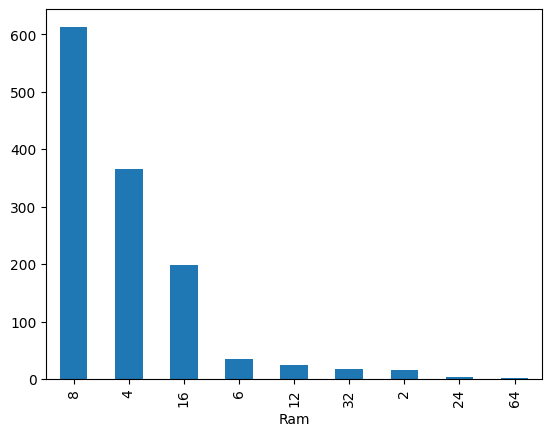

In [47]:
df['Ram'].value_counts().plot(kind='bar')

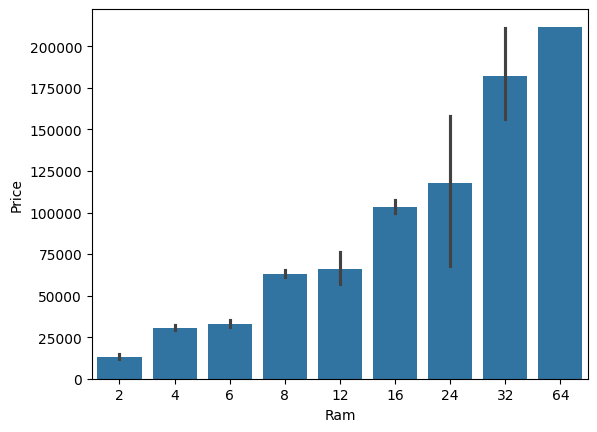

In [48]:
sns.barplot(x=df['Ram'],y=df['Price'])
plt.show()

In [49]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          215
500GB HDD                        123
512GB SSD                        114
128GB SSD +  1TB HDD              94
128GB SSD                         74
256GB SSD +  1TB HDD              73
32GB Flash Storage                36
2TB HDD                           16
512GB SSD +  1TB HDD              14
1TB SSD                           14
64GB Flash Storage                13
256GB SSD +  2TB HDD              10
256GB Flash Storage                8
1.0TB Hybrid                       7
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
64GB SSD                       

In [50]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_brand
609,Acer,Notebook,4,128GB Flash Storage,Intel HD Graphics 405,Windows 10,1.60,18594.72,0,0,111.935204,Other Intel Processor
619,Acer,2 in 1 Convertible,4,32GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.25,20193.12,1,1,135.094211,Other Intel Processor
849,HP,Ultrabook,8,512GB SSD,Intel HD Graphics 520,Windows 10,1.54,78215.04,0,0,157.350512,Intel Core i7
993,Lenovo,Notebook,8,256GB SSD,Intel HD Graphics 520,Windows 10,2.30,71874.72,0,0,141.211998,Intel Core i5
303,Lenovo,Notebook,8,2TB HDD,Nvidia GeForce 940MX,No OS,2.20,29250.72,0,0,100.454670,Intel Core i5


In [51]:
# Step 1: Standardize the Memory column
df['Memory'] = df['Memory'].astype(str).replace(r'\.0', '', regex=True)  # Remove trailing '.0'
df["Memory"] = df["Memory"].str.replace('GB', '')  # Remove 'GB'
df["Memory"] = df["Memory"].str.replace('TB', '000')  # Replace 'TB' with '000'

# Split the Memory column into two parts if '+' is present
new = df["Memory"].str.split("+", n=1, expand=True)

# Extract the first and second parts after splitting
df["first"] = new[0].str.strip()  # First storage type
df["second"] = new[1]  # Second storage type (if any)

# Step 2: Identify storage types in the first part
df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)  # HDD flag for first part
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)  # SSD flag for first part
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)  # Hybrid flag for first part
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)  # Flash Storage flag for first part

# Remove all non-digit characters from the first part
df['first'] = df['first'].str.replace(r'[^\d]', '', regex=True)

# Step 3: Handle the second part
df["second"].fillna("0", inplace=True)  # Replace missing values with 0

# Identify storage types in the second part
df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)  # HDD flag for second part
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)  # SSD flag for second part
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)  # Hybrid flag for second part
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)  # Flash Storage flag for second part

# Remove all non-digit characters from the second part
df['second'] = df['second'].str.replace(r'[^\d]', '', regex=True)

# Step 4: Convert storage capacities to integers
df["first"] = df["first"].astype(int)  # Convert cleaned first part to integer
df["second"] = df["second"].astype(int)  # Convert cleaned second part to integer

# Step 5: Calculate total capacities for each storage type
df["HDD"] = (df["first"] * df["Layer1HDD"]) + (df["second"] * df["Layer2HDD"])  # Total HDD capacity
df["SSD"] = (df["first"] * df["Layer1SSD"]) + (df["second"] * df["Layer2SSD"])  # Total SSD capacity
df["Hybrid"] = (df["first"] * df["Layer1Hybrid"]) + (df["second"] * df["Layer2Hybrid"])  # Total Hybrid capacity
df["Flash_Storage"] = (df["first"] * df["Layer1Flash_Storage"]) + (df["second"] * df["Layer2Flash_Storage"])  # Total Flash Storage capacity

# Step 6: Drop intermediate columns used for calculations
df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
                 'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
                 'Layer2Flash_Storage'], inplace=True)

In [52]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [53]:
df.drop(columns=['Memory'],inplace=True)
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [54]:
df.corr(numeric_only=True)['Price']

Ram              0.740106
Weight           0.212192
Price            1.000000
TouchScreen      0.188631
IPS              0.250358
PPI              0.469539
HDD             -0.098011
SSD              0.669957
Hybrid           0.022533
Flash_Storage   -0.037176
Name: Price, dtype: float64

In [55]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256


In [56]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      279
Intel HD Graphics 520      181
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
Nvidia Quadro M500M          1
AMD Radeon R7 M360           1
Nvidia Quadro M3000M         1
Nvidia GeForce 960M          1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [57]:
df['Gpu_brand'] = df['Gpu'].apply(lambda x:x.split()[0])

df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_brand,HDD,SSD,Gpu_brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [58]:
df['Gpu_brand'].value_counts()

Gpu_brand
Intel     703
Nvidia    396
AMD       174
ARM         1
Name: count, dtype: int64

In [59]:
df = df[df['Gpu_brand']!='ARM']

In [60]:
df['Gpu_brand'].value_counts()

Gpu_brand
Intel     703
Nvidia    396
AMD       174
Name: count, dtype: int64

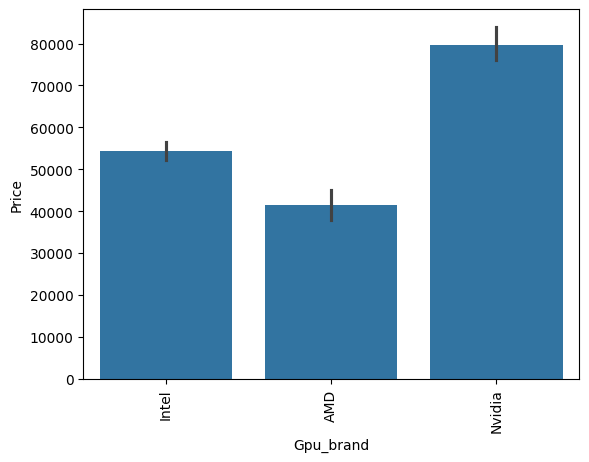

In [61]:
sns.barplot(x=df['Gpu_brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [62]:
df.drop(columns=['Gpu'],inplace=True)

df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_brand,HDD,SSD,Gpu_brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [63]:
df['OpSys'].value_counts()

OpSys
Windows 10      1047
No OS             66
Linux             58
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

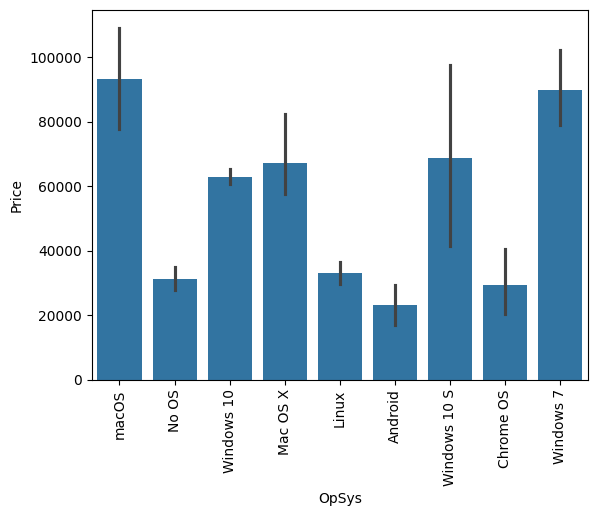

In [64]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [65]:
def os_category(inp):
    if inp=='Windows 10' or inp=='Windows 7' or inp=='Windows 10 S':
        return 'Windows'
    elif inp=='macOS' or inp=='Mac OS X':
        return 'Mac'
    elif inp=='Linux':
        return 'Linux'
    else:
        return 'Others/No OS'

In [66]:
df['OS'] = df['OpSys'].apply(os_category)

df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_brand,HDD,SSD,Gpu_brand,OS
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [67]:
df.drop(columns=['OpSys'],inplace=True)

df.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,IPS,PPI,CPU_brand,HDD,SSD,Gpu_brand,OS
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


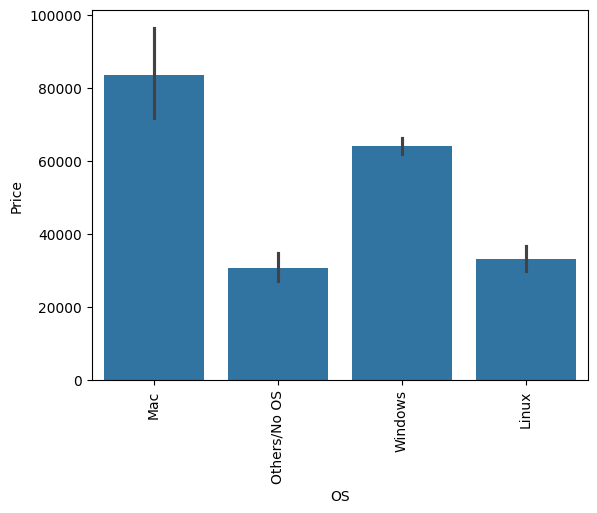

In [68]:
sns.barplot(x=df['OS'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='Weight', ylabel='Density'>

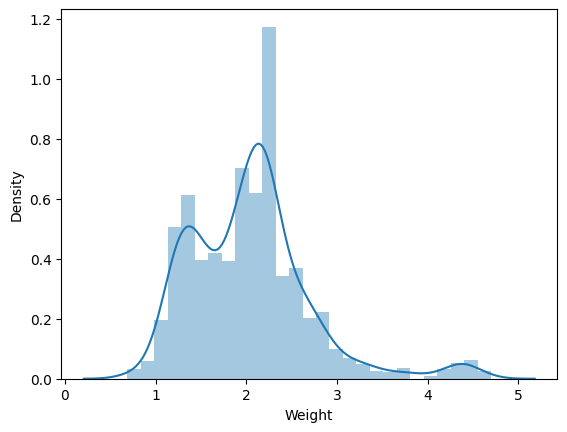

In [69]:
sns.distplot(df['Weight'])

<Axes: xlabel='Weight', ylabel='Price'>

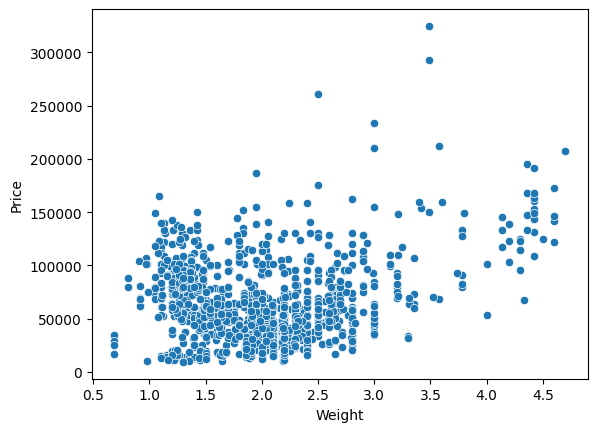

In [70]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

In [71]:
df.corr(numeric_only=True)['Price']

Ram            0.739996
Weight         0.211667
Price          1.000000
TouchScreen    0.190382
IPS            0.251514
PPI            0.471481
HDD           -0.098481
SSD            0.669808
Name: Price, dtype: float64

<Axes: >

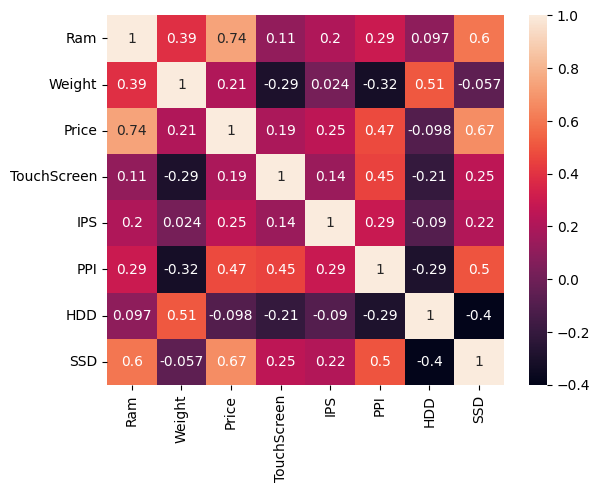

In [72]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

<Axes: xlabel='Price', ylabel='Density'>

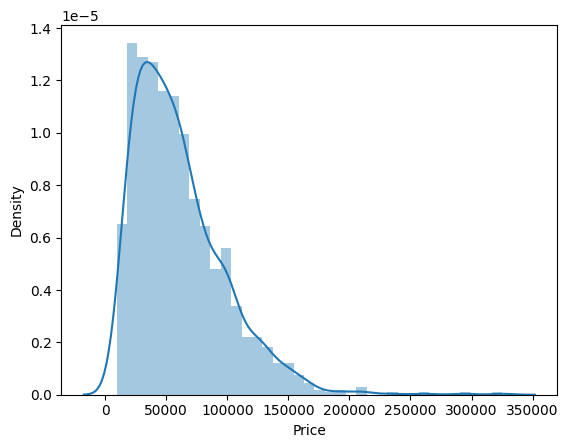

In [73]:
sns.distplot(df['Price'])

<Axes: xlabel='Price', ylabel='Density'>

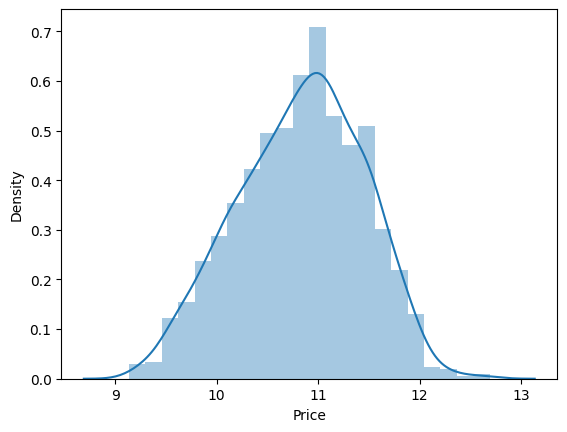

In [74]:
sns.distplot(np.log(df['Price']))

In [75]:
X= df.drop(columns=['Price'])
y= np.log(df['Price'])

In [76]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1269    10.555257
1270    10.433899
1271    11.288115
1272     9.409283
1273    10.614129
Name: Price, Length: 1273, dtype: float64

In [141]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=2)

In [142]:
X_train.shape

(1018, 12)

In [143]:
X_test.shape

(255, 12)

In [131]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [132]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor,StackingRegressor

## Linear Regression

In [107]:
step1 = ColumnTransformer(
                            transformers = [('column_trnf',
                                           OneHotEncoder(sparse_output=False,drop='first'),
                                           [0,1,7,10,11])],
                            remainder = 'passthrough')

step2 = LinearRegression()

pipe = Pipeline([('step1',step1),
                 ('step2',step2)])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 Score:',r2_score(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))

R2 Score: 0.79454342622755
MAE: 0.20934265578634353


# Ridge Regression

In [108]:
step1 = ColumnTransformer(
                            transformers = [('column_trnf',
                                           OneHotEncoder(sparse_output=False,drop='first'),
                                           [0,1,7,10,11])],
                            remainder = 'passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([('step1',step1),
                 ('step2',step2)])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 Score:',r2_score(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))

R2 Score: 0.8069494351673856
MAE: 0.20608882764981604


## Lasso Regression

In [109]:
step1 = ColumnTransformer(
                            transformers = [('column_trnf',
                                           OneHotEncoder(sparse_output=False,drop='first'),
                                           [0,1,7,10,11])],
                            remainder = 'passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([('step1',step1),
                 ('step2',step2)])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 Score:',r2_score(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))

R2 Score: 0.8023092198189941
MAE: 0.2082194862438552


## KNN

In [110]:
step1 = ColumnTransformer(
                            transformers = [('column_trnf',
                                           OneHotEncoder(sparse_output=False,drop='first'),
                                           [0,1,7,10,11])],
                            remainder = 'passthrough')

step2 = KNeighborsRegressor(n_neighbors=5,weights='distance')

pipe = Pipeline([('step1',step1),
                 ('step2',step2)])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 Score:',r2_score(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))

R2 Score: 0.768222655738597
MAE: 0.20084892911181274


## Decision Tree

In [111]:
step1 = ColumnTransformer(
                            transformers = [('column_trnf',
                                           OneHotEncoder(sparse_output=False,drop='first'),
                                           [0,1,7,10,11])],
                            remainder = 'passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([('step1',step1),
                 ('step2',step2)])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 Score:',r2_score(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))

R2 Score: 0.7665412571043799
MAE: 0.21877434700427736


## SVM

In [112]:
step1 = ColumnTransformer(
                            transformers = [('column_trnf',
                                           OneHotEncoder(sparse_output=False,drop='first'),
                                           [0,1,7,10,11])],
                            remainder = 'passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([('step1',step1),
                 ('step2',step2)])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 Score:',r2_score(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))

R2 Score: 0.8333666363841985
MAE: 0.19013101262331342


## Random Forest

In [255]:
step1 = ColumnTransformer(
                            transformers = [('column_trnf',
                                           OneHotEncoder(sparse_output=False,drop='first'),
                                           [0,1,7,10,11])],
                            remainder = 'passthrough')

step2 = RandomForestRegressor(n_estimators=615,
                              max_samples=0.5,
                              max_features=0.2,
                              max_depth=None,
                              random_state=3)

pipe = Pipeline([('step1',step1),
                 ('step2',step2)])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 Score:',r2_score(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))

R2 Score: 0.8760268777913862
MAE: 0.1636998997624253


## ExtraTrees

In [254]:
step1 = ColumnTransformer(
                            transformers = [('column_trnf',
                                           OneHotEncoder(sparse_output=False,drop='first'),
                                           [0,1,7,10,11])],
                            remainder = 'passthrough')

step2 = ExtraTreesRegressor(n_estimators=615,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15,
                              random_state=3,
                              bootstrap=True)

pipe = Pipeline([('step1',step1),
                 ('step2',step2)])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 Score:',r2_score(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))

R2 Score: 0.8691943975972165
MAE: 0.1688231692092302


## AdaBoost

In [115]:
step1 = ColumnTransformer(
                            transformers = [('column_trnf',
                                           OneHotEncoder(sparse_output=False,drop='first'),
                                           [0,1,7,10,11])],
                            remainder = 'passthrough')

step2 = AdaBoostRegressor(n_estimators=80,learning_rate=1.0)

pipe = Pipeline([('step1',step1),
                 ('step2',step2)])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 Score:',r2_score(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))

R2 Score: 0.7914247900566675
MAE: 0.22001709782008097


## Gradient Boost

In [116]:
step1 = ColumnTransformer(
                            transformers = [('column_trnf',
                                           OneHotEncoder(sparse_output=False,drop='first'),
                                           [0,1,7,10,11])],
                            remainder = 'passthrough')

step2 = GradientBoostingRegressor(n_estimators=100,max_depth=5)

pipe = Pipeline([('step1',step1),
                 ('step2',step2)])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 Score:',r2_score(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))

R2 Score: 0.8676009962754156
MAE: 0.16548319642264298


## XgBoost

In [117]:
step1 = ColumnTransformer(
    transformers=[
        ('column_trnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 7, 10, 11])
    ],
    remainder='passthrough'
)

step1.fit(X_train)

X_train_transformed = step1.transform(X_train)
X_test_transformed = step1.transform(X_test)

step2 = XGBRegressor(n_estimators=45,max_depth=5)
step2.fit(X_train_transformed, y_train)

y_pred = step2.predict(X_test_transformed)

print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R2 Score: 0.8681501592881586
MAE: 0.16221260571797147


In [118]:
np.exp(0.16687303282607777)

np.float64(1.181604230833953)

## Voting Regressor

In [119]:
step1 = ColumnTransformer(
                            transformers = [('column_trnf',
                                           OneHotEncoder(sparse_output=False,drop='first'),
                                           [0,1,7,10,11])],
                            remainder = 'passthrough')

rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15,bootstrap=True)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
adb = AdaBoostRegressor(n_estimators=200)
et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=10,bootstrap=True)

step2 = VotingRegressor(estimators=[('rf',rf),
                                    ('adb',adb),
                                    ('et',et),
                                    ('gb',gbdt)])

pipe = Pipeline([('step1',step1),
                 ('step2',step2)])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 Score:',r2_score(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))

R2 Score: 0.8605416516967315
MAE: 0.17694871398405088


## Stacking

In [127]:
step1 = ColumnTransformer(
                            transformers = [('column_trnf',
                                           OneHotEncoder(sparse_output=False,drop='first'),
                                           [0,1,7,10,11])],
                            remainder = 'passthrough')

rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15,bootstrap=True)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
adb = AdaBoostRegressor(n_estimators=200)
et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=10,bootstrap=True)

step2 = StackingRegressor(estimators=[('rf',rf),
                                    ('adb',adb),
                                    ('et',et),
                                    ('gb',gbdt)],
                         final_estimator=Ridge(alpha=10))

pipe = Pipeline([('step1',step1),
                 ('step2',step2)])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 Score:',r2_score(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))

R2 Score: 0.8649674011714776
MAE: 0.17002816760456554


 ## We are selecting the Random Forest model.

In [256]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))